In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv') 

In [6]:
# define a model for fitting and calculating the MSE
def run_model(data):
    X = data.drop(labels = ['price'],axis = 1)
    y = data['price']
    lin_model = LinearRegression()
    lin_model.fit(X,y)
    y_pred = lin_model.predict(X)
    r_squared = metrics.r2_score(y,y_pred)
    mse = metrics.mean_squared_error(y,y_pred)
    num = np.arange(0,143)
    #plt.scatter(num,data['price'])
    #plt.plot(num,y_pred)
    plt.scatter(y_pred,y)
    return r_squared, mse, y-y_pred

In [7]:
#Viausalize our result
def run_model_visual(data):
    X = data.drop(labels = ['price'],axis = 1)
    y = data['price']
    lin_model = LinearRegression()
    lin_model.fit(X,y)
    y_pred = lin_model.predict(X)
    r_squared = metrics.r2_score(y,y_pred)
    fig = plt.figure(figsize=(11,5))
    plt.scatter(y,y_pred)
    plt.xlabel('y_test', fontsize=18)
    plt.ylabel('y_pred', fontsize=16)
    f = lambda x: x
    x = np.array(y_pred)
    plt.plot(x,f(x),lw=2.5, c="orange")


In [8]:
#define continous and categorial features
cont_vars = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower'
            ,'peakrpm','citympg','highwaympg']
categorial = ['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [9]:
#check null value
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
#perform datacleaning
df_cleaned = df.copy()
# get brand of car and correct typos
df_cleaned['CarName'] = df_cleaned['CarName'].str.split(' ').str.get(0)
df_cleaned['CarName'].replace('maxda','mazda',inplace = True)
df_cleaned['CarName'].replace('porcshce','porsche',inplace = True)
df_cleaned['CarName'].replace('toyouta','toyota',inplace = True)
df_cleaned['CarName'].replace('vokswagen','volkswagen',inplace = True)
df_cleaned['CarName'].replace('vw','volkswagen',inplace = True)
df_cleaned['CarName'].replace('nissan','Nissan',inplace = True)
df_cleaned.set_index('car_ID',inplace = True)
df_cleaned['CarName'].unique()


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Data understanding

In [11]:
df_cleaned.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


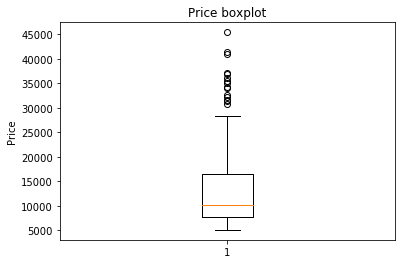

In [17]:
# The boxplot of all Carprice
plt.boxplot(df_cleaned.price)
plt.ylabel('Price')
plt.title('Price boxplot')
plt.show()


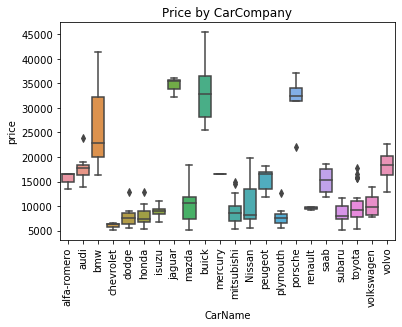

In [16]:
# Carprice versus brands
ax = sns.boxplot(x = df_cleaned.CarName,y = df_cleaned.price)
plt.title('Price by CarCompany')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()
##Only 4 car company’s car price over 30000 (BMW, Jaguar, Buick and Porsche)
#It is reasonable to keep these outliers

[Text(0, 0, 'front'), Text(0, 0, 'rear')]

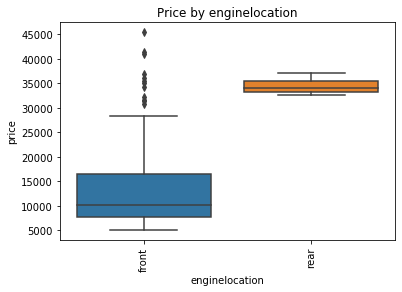

In [18]:
#rear enginelocation shows statistical significance than front
ax = sns.boxplot(x = df_cleaned.enginelocation,y = df_cleaned.price)
plt.title('Price by enginelocation')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'gas'), Text(0, 0, 'diesel')]

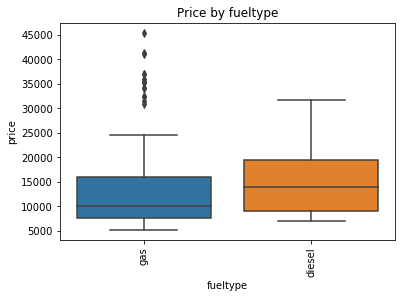

In [303]:
#fueltype shows slightly different versus carprice
ax = sns.boxplot(x = df_cleaned.fueltype,y = df_cleaned.price)
plt.title('Price by fueltype')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

[Text(0, 0, 'two'), Text(0, 0, 'four')]

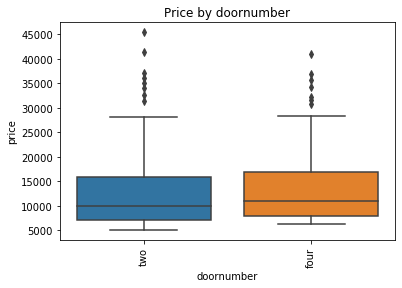

In [208]:
#Two adn four doornumbers are comparable
ax = sns.boxplot(x = df_cleaned.doornumber,y = df_cleaned.price)
plt.title('Price by doornumber')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

# Split data into training set and test set

In [19]:
np.random.seed(0)
df_train, df_test = train_test_split(df_cleaned, train_size = 0.7, test_size = 0.3, random_state = 100)

# Pefrom feature selection for continous data

In [20]:
#perform feature selection for continous data
X = df_train.drop(labels = ['price'],axis = 1)
y = df_train['price']

In [21]:
cont_data = X[cont_vars]

ftest = SelectKBest(score_func=f_regression, k='all')
fit_ftest = ftest.fit(cont_data,y)
f_scores = pd.DataFrame(fit_ftest.scores_)
dfcolumns = pd.DataFrame(cont_data.columns)
f_scores = pd.concat([dfcolumns,f_scores],axis=1)
f_scores.columns = ['Feature','F-Score']  
f_scores = f_scores.sort_values(by = 'F-Score',ascending = False)
f_scores

,Feature,F-Score
5,enginesize,430.488900
4,curbweight,407.216278
9,horsepower,261.777750
2,carwidth,249.591029
1,carlength,146.424930
12,highwaympg,126.999719
11,citympg,117.557542
0,wheelbase,89.248846
6,boreratio,56.125469
8,compressionratio,3.744818


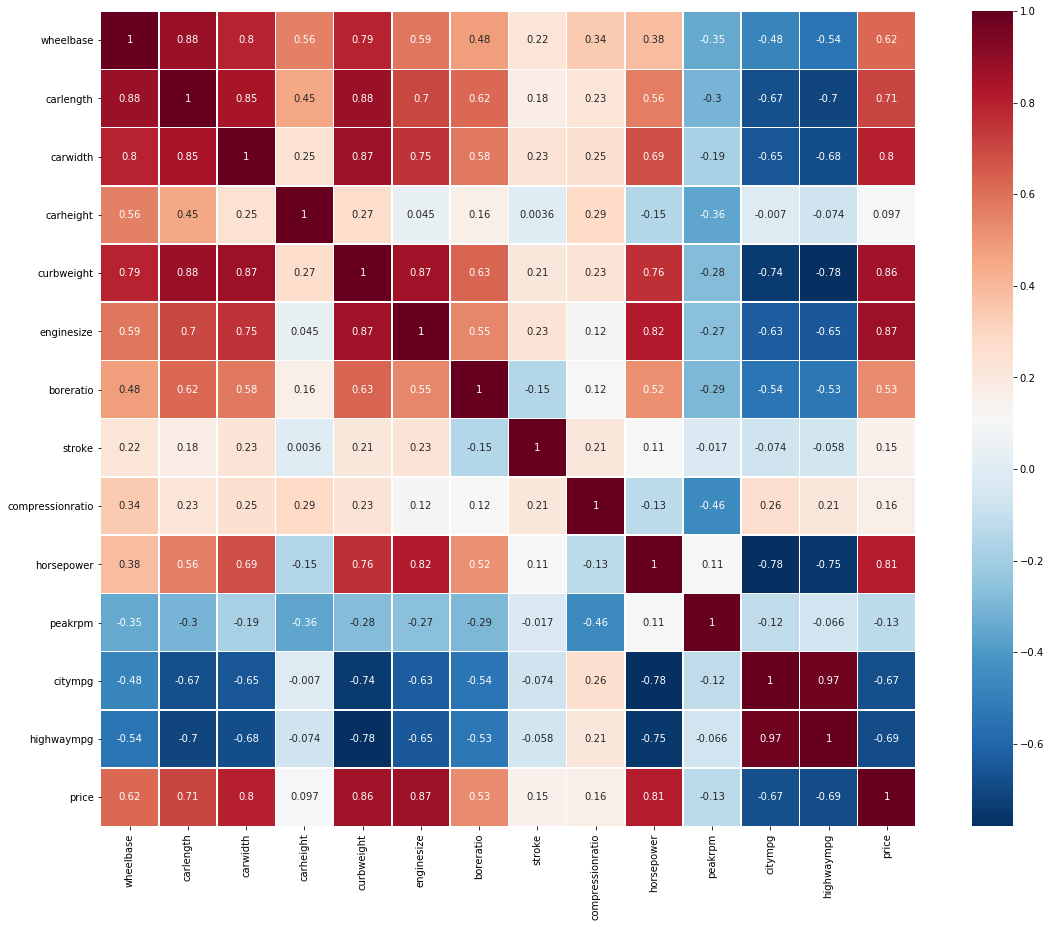

In [22]:
# Examine correlations between continuous features using correlation matrix
feats = df_train[cont_vars+['price']]
cm = feats.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()

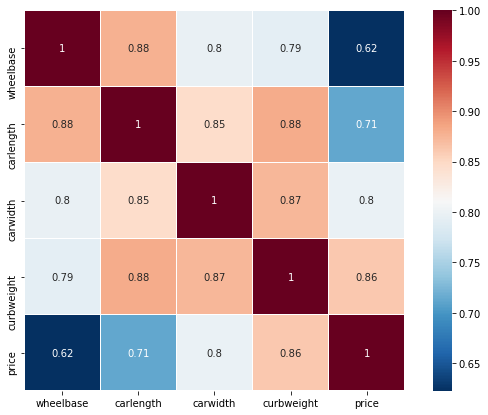

In [23]:
# Examine correlations between continuous features using correlation matrix
feats = df_train[['wheelbase','carlength','carwidth','curbweight']+['price']]
cm = feats.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()

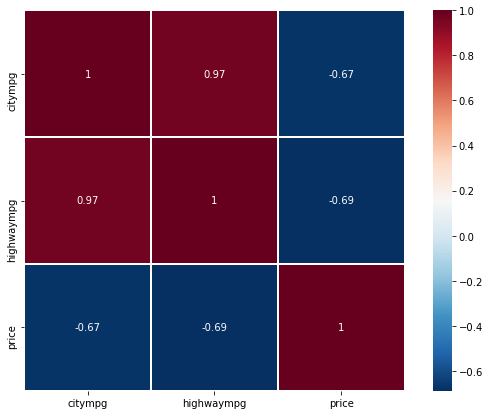

In [24]:
# Examine correlations between continuous features using correlation matrix
feats = df_train[['citympg','highwaympg']+['price']]
cm = feats.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(cm, annot=True, cmap = 'RdBu_r',linewidth=0.5,square=True)
plt.show()

# Pefrom feature selection for categorial data

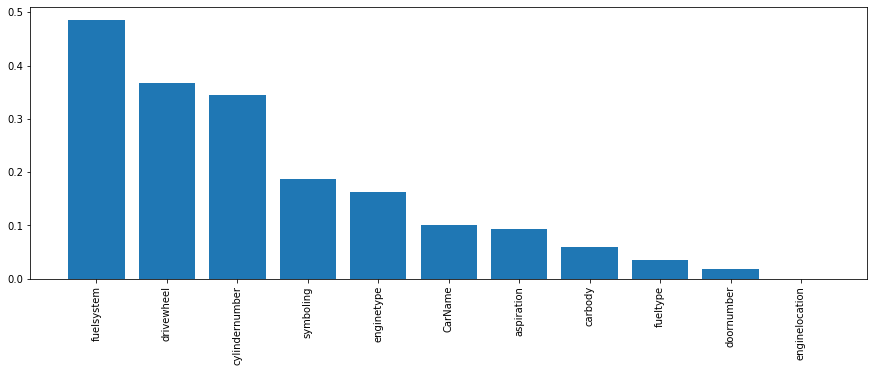

In [26]:
# convert categorial datat to numeric data
cat_data = X.drop(labels=cont_vars,axis=1)
cat_data = cat_data.astype('category')
cat_data = cat_data.apply(lambda x: x.cat.codes,axis=0)

# Run mutual info test
mutual_info_test = SelectKBest(score_func=mutual_info_regression, k='all')
mutual_info_fit = mutual_info_test.fit(cat_data,y)

# Put scores and features names in a dataframe
mi_scores = pd.DataFrame(mutual_info_fit.scores_)
dfcolumns = pd.DataFrame(cat_data.columns)
mi_scores = pd.concat([dfcolumns,mi_scores],axis=1)
mi_scores.columns = ['Feature','Score']  

# Sort them by value
mi_scores = mi_scores.sort_values(by='Score',ascending=False)

# Plot scores
plt.figure(figsize=(15,5))
plt.bar(x=mi_scores['Feature'],height=mi_scores['Score'])
plt.xticks(rotation=90)
plt.show()

In [27]:
# Run an ANOVA on the worst performing features to see if we get the same result
poor_feats = mi_scores['Feature'][-3:]
poor_feats_data = cat_data[poor_feats]
poor_feats_data['SalePrice'] = y

pvals = []
# Run an ANOVA to see if the difference in means is statistically significant
for col in cat_data[poor_feats]:
    aov_model = ols('SalePrice ~ {}'.format(col),data=poor_feats_data).fit()
    aov_table = sm.stats.anova_lm(aov_model, typ=2)
    pval = aov_table.iloc[0]['PR(>F)']
    pvals.append(pval)

pval_df = pd.DataFrame(data={'Feature':list(poor_feats.values),'P-value':pvals})
pval_df['Significant'] = 'No'
pval_df.loc[pval_df['P-value']<0.01,'Significant'] = 'Yes'
pval_df

,Feature,P-value,Significant
0,fueltype,0.022203,No
1,doornumber,0.367378,No
2,enginelocation,0.006593,Yes


In [28]:
cont_vars_new = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower'
            ,'citympg','highwaympg']
cat_vars_new = ['symboling','peakrpm','CarName','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

In [29]:
# One-hot encode categories less than n_cat_max unique values
df_new = df_cleaned.copy()
n_cat_max = 5
df_new[categorial] = df_new[categorial].astype('category') # Convert to category type
for var in categorial:
    if df_new[var].nunique()>n_cat_max:
        df_new[var]=df_new[var].cat.codes # If # categories > 5, use label encoding
    else:
        dummycolumns = pd.get_dummies(df_new[var],prefix=var,dummy_na=True) # Otherwise one-hot encode
        df_new = pd.concat([df_new,dummycolumns],axis=1)
        df_new = df_new.drop(var,axis=1)

In [30]:
#df_new.drop(['fueltype_nan','aspiration_nan','doornumber_nan','carbody_nan','drivewheel_nan','enginelocation_nan','doornumber_four','doornumber_two'],axis = 1,inplace = True)
df_new.drop(['fueltype_nan','aspiration_nan','doornumber_nan','carbody_nan','drivewheel_nan','enginelocation_nan'],axis = 1,inplace = True)

In [31]:
#df_new.drop(['carheight','peakrpm','stroke','compressionratio'],axis = 1,inplace = True)
df_new.drop(['carheight','stroke','compressionratio','citympg','curbweight','carlength','doornumber_four',
       'doornumber_two','fueltype_diesel', 'fueltype_gas'],axis = 1,inplace = True)

In [32]:
df_new.columns

Index(['symboling', 'CarName', 'wheelbase', 'carwidth', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'horsepower',
       'peakrpm', 'highwaympg', 'price', 'aspiration_std', 'aspiration_turbo',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear'],
      dtype='object')

In [33]:
#scale and standardized data
#for i in cont_vars_new:
    #df_new[i] = (df_new[i]-df_new[i].mean()) / df_new[i].std()
#df_new

In [34]:
np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size = 0.7, test_size = 0.3, random_state = 100)

R-squared: 0.89
Mean Squared Error: 6939060.69


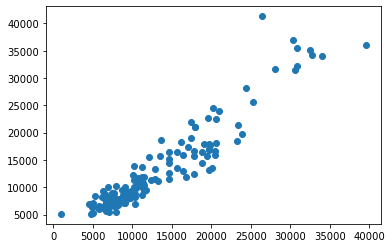

In [35]:
r2,mse_score,residual = run_model(df_train)
print('R-squared: {:.2f}'.format(r2))
print('Mean Squared Error: {:.2f}'.format(mse_score))

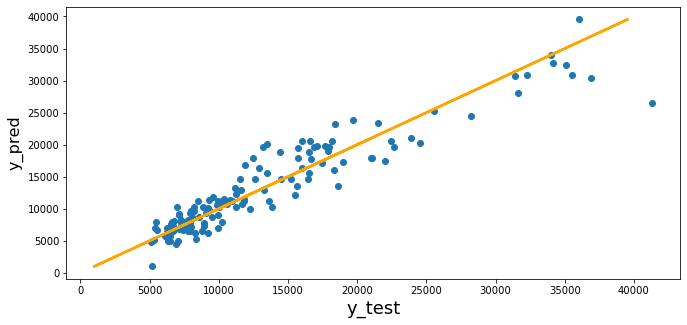

In [36]:
run_model_visual(df_train)

Text(0.5, 0, 'Errors')

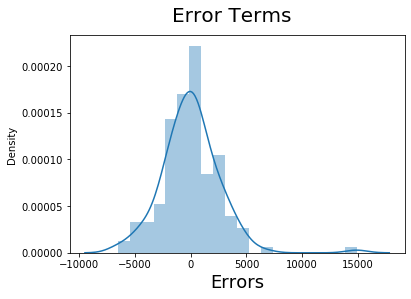

In [37]:
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [38]:
residual.std()

2643.468802694194

In [39]:
def run_model_test(data,data_test):
    X = data.drop(labels = ['price'],axis = 1)
    y = data['price']
    X_test = data_test.drop(labels = ['price'],axis = 1)
    y_test = data_test['price']
    lin_model = LinearRegression()
    lin_model.fit(X,y)
    y_pred = lin_model.predict(X_test)
    r_squared = metrics.r2_score(y_test,y_pred)
    mse = metrics.mean_squared_error(y_test,y_pred)
    num = np.arange(0,62)
    plt.scatter(num,data_test['price'])
    plt.plot(num,y_pred)
    return r_squared, mse,y_test-y_pred

In [40]:
def run_model_visual_test(data,data_test):
    X = data.drop(labels = ['price'],axis = 1)
    y = data['price']
    X_test = data_test.drop(labels = ['price'],axis = 1)
    y_test = data_test['price']
    lin_model = LinearRegression()
    lin_model.fit(X,y)
    y_pred = lin_model.predict(X_test)
    r_squared = metrics.r2_score(y_test,y_pred)
    fig = plt.figure(figsize=(11,5))
    plt.scatter(y_test,y_pred)
    plt.xlabel('y_test', fontsize=18)
    plt.ylabel('y_pred', fontsize=16)
    f = lambda x: x
    x = np.array(y_pred)
    plt.plot(x,f(x),lw=2.5, c="orange")

Text(0.5, 0, 'Errors')

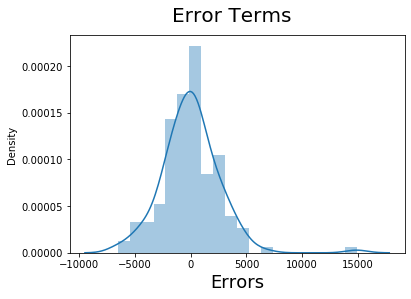

In [41]:
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [42]:
residual.mean()

9.870879560500592e-12

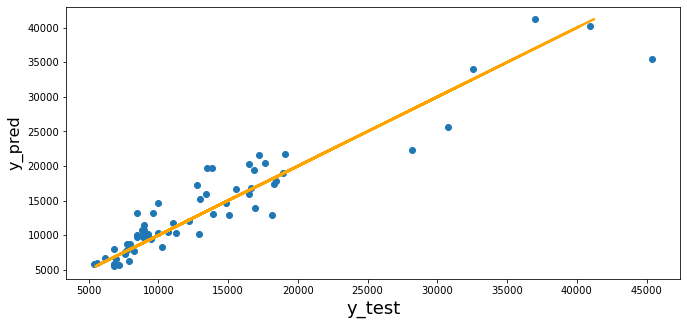

In [43]:
run_model_visual_test(df_train,df_test)